These results are for HBM-stack DRAM cache (16 interface of 128-MB) backed-up by DDR4 memory (2 interface of 32-GB).

In [28]:
import pandas as pd
import numpy as np
import sys
from matplotlib import pyplot as plt

import os

datadir = '/scr/babaie/policyBaselineRes/3rd/dramCacheController/results'


def getStat(filename, stat):
    filename = os.path.join(filename).replace('\\','/')
    #print(stat)
    #print(filename)
    try:
        with open(filename) as f:
            readlines = f.readlines()
            for l in readlines:
                if stat in l:
                    return l
            return 0.0 #for cases where stat was not found
    except: #for cases where the file was not found
        return 0.0



Stats = ['system.mem_ctrl.readReqs',
         'system.mem_ctrl.writeReqs',
         'system.mem_ctrl.servicedByWrQ',
         'system.mem_ctrl.mergedWrBursts',
         'system.mem_ctrl.numTotHits',
         'system.mem_ctrl.numTotMisses',
         'system.mem_ctrl.numColdMisses',
         'system.mem_ctrl.numHotMisses',
         'system.mem_ctrl.numRdMissClean',
         'system.mem_ctrl.numRdMissDirty',
         'system.mem_ctrl.numRdHit',
         'system.mem_ctrl.numWrMissClean',
         'system.mem_ctrl.numWrMissDirty',
         'system.mem_ctrl.numWrHit',
         'system.mem_ctrl.numRdHitDirty',
         'system.mem_ctrl.numRdHitClean',
         'system.mem_ctrl.numWrHitDirty',
         'system.mem_ctrl.numWrHitClean',
         'system.loc_mem_ctrl.dram.readBursts',
         'system.loc_mem_ctrl.dram.writeBursts',
         'system.far_mem_ctrl.dram.readBursts',
         'system.far_mem_ctrl.dram.writeBursts',
         'system.mem_ctrl.numColdMisses'
          ]




app = ['bc', 'bfs', 'cc', 'pr', 'tc']
time = ['5sec']
size = ['128MiB']
cache = ['Alloy']

rows = []

for a in app:
    for t in time:
        for s in size:
            for c in cache:
                stats = [a, t, s, c]
                for stat in Stats:
                    time_file_path = '{}/GAPBS/{}_{}_{}/{}_20/stats.txt'.format(datadir, t, s, c, a)
                    ret_line = getStat(time_file_path,stat)

                    if ret_line != 0:
                        #if ret_line=='nan' :
                        #    stat_val = 0
                        #else:
                        stat_val = ret_line.split()[1]
                    else:
                        stat_val = -1
                    stats.append(stat_val)

                rows.append(stats)

#print(rows)
df = pd.DataFrame(rows, columns=[
         'app',
         'time',
         'size',
         'cache',
         'readReqs',
         'writeReqs',
         'servicedByWrQ',
         'mergedWrBursts',
         'numTotHits',
         'numTotMisses',
         'numColdMisses',
         'numHotMisses',
         'numRdMissClean',
         'numRdMissDirty',
         'numRdHit',
         'numWrMissClean',
         'numWrMissDirty',
         'numWrHit',
         'numRdHitDirty',
         'numRdHitClean',
         'numWrHitDirty',
         'numWrHitClean',
         'system.loc_mem_ctrl.dram.readBursts',
         'system.loc_mem_ctrl.dram.writeBursts',
         'system.far_mem_ctrl.dram.readBursts',
         'system.far_mem_ctrl.dram.writeBursts',
         'system.mem_ctrl.numColdMisses'
         ])





# df.to_csv("/scr/babaie/policyBaselineRes/3rd/dramCacheController/myPlots/res_Oct_31/gapbs_ddr4_128_2sec.csv")

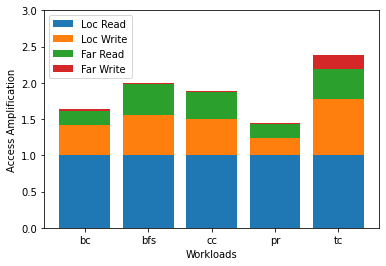

In [29]:
x = df['app']

y1 = df['system.loc_mem_ctrl.dram.readBursts'].astype(float) / (df['readReqs'].astype(float)+df['writeReqs'].astype(float))
y2 = df['system.loc_mem_ctrl.dram.writeBursts'].astype(float) / (df['readReqs'].astype(float)+df['writeReqs'].astype(float))
y3 = df['system.far_mem_ctrl.dram.readBursts'].astype(float) / (df['readReqs'].astype(float)+df['writeReqs'].astype(float))
y4 = df['system.far_mem_ctrl.dram.writeBursts'].astype(float) / (df['readReqs'].astype(float)+df['writeReqs'].astype(float))

# Multi bar Chart
fig = plt.figure()
fig.set_size_inches(6, 4)

plt.ylim([0,3])

plt.bar(x, y1, label = 'Loc Read')
plt.bar(x, y2, bottom=y1, label = 'Loc Write')
plt.bar(x, y3, bottom=y1+y2, label = 'Far Read')
plt.bar(x, y4, bottom=y1+y2+y3, label = 'Far Write')

plt.title("")
plt.xlabel("Workloads")
plt.ylabel("Access Amplification")
plt.legend()
plt.show()

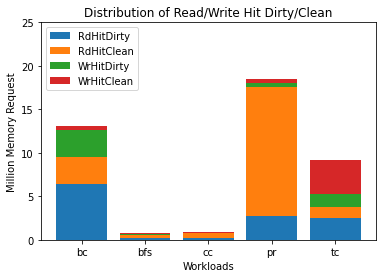

In [30]:
x = df['app']

y5 = df['numRdHitDirty'].astype(int)/1000000
y6 = df['numRdHitClean'].astype(int)/1000000
y7 = df['numWrHitDirty'].astype(int)/1000000
y8 = df['numWrHitClean'].astype(int)/1000000

# Multi bar Chart
fig = plt.figure()
fig.set_size_inches(6, 4)
plt.ylim([0,25])

plt.bar(x, y5, label = 'RdHitDirty')
plt.bar(x, y6, bottom=y5, label = 'RdHitClean')
plt.bar(x, y7, bottom=y5+y6, label = 'WrHitDirty')
plt.bar(x, y8, bottom=y5+y6+y7, label = 'WrHitClean')

plt.title("Distribution of Read/Write Hit Dirty/Clean")
plt.xlabel("Workloads")
plt.ylabel("Million Memory Request")
plt.legend()
plt.show()

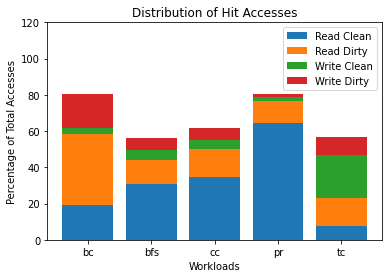

In [31]:
x = df['app']

y1 = 100*df['numRdHitClean'].astype(int)/(df['readReqs'].astype(int)+df['writeReqs'].astype(int))
y2 = 100*df['numRdHitDirty'].astype(int)/(df['readReqs'].astype(int)+df['writeReqs'].astype(int))
y3 = 100*df['numWrHitClean'].astype(int)/(df['readReqs'].astype(int)+df['writeReqs'].astype(int))
y4 = 100*df['numWrHitDirty'].astype(int)/(df['readReqs'].astype(int)+df['writeReqs'].astype(int))

# Multi bar Chart
fig = plt.figure()
fig.set_size_inches(6, 4)

plt.ylim([0,120])

plt.bar(x, y1, label = 'Read Clean')
plt.bar(x, y2, bottom=y1, label = 'Read Dirty')
plt.bar(x, y3, bottom=y1+y2, label = 'Write Clean')
plt.bar(x, y4, bottom=y1+y2+y3, label = 'Write Dirty')

plt.title("Distribution of Hit Accesses")
plt.xlabel("Workloads")
plt.ylabel("Percentage of Total Accesses")
plt.legend()
plt.show()

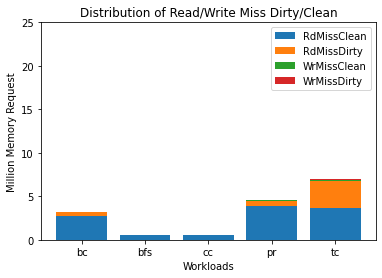

In [32]:
x = df['app']
y1 = df['numRdMissClean'].astype(int)/1000000
y2 = df['numRdMissDirty'].astype(int)/1000000
y3 = df['numWrMissClean'].astype(int)/1000000
y4 = df['numWrMissDirty'].astype(int)/1000000

# Multi bar Chart
fig = plt.figure()
fig.set_size_inches(6, 4)
plt.ylim([0,25])

plt.bar(x, y1, label = 'RdMissClean')
plt.bar(x, y2, bottom=y1, label = 'RdMissDirty')
plt.bar(x, y3, bottom=y1+y2, label = 'WrMissClean')
plt.bar(x, y4, bottom=y1+y2+y3, label = 'WrMissDirty')

plt.title("Distribution of Read/Write Miss Dirty/Clean")
plt.xlabel("Workloads")
plt.ylabel("Million Memory Request")
plt.legend()
plt.show()

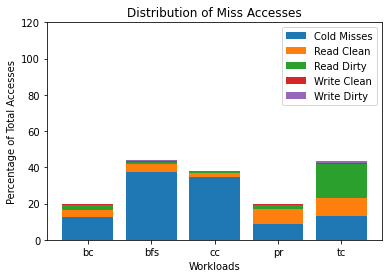

In [35]:
x = df['app']

y1 = 100 * df['system.mem_ctrl.numColdMisses'].astype(int)/(df['readReqs'].astype(int)+df['writeReqs'].astype(int))
y2 = 100 * (df['numRdMissClean'].astype(int)-df['system.mem_ctrl.numColdMisses'].astype(int))/(df['readReqs'].astype(int)+df['writeReqs'].astype(int))
y3 = 100 * df['numRdMissDirty'].astype(int)/(df['readReqs'].astype(int)+df['writeReqs'].astype(int))
y4 = 100 * df['numWrMissClean'].astype(int)/(df['readReqs'].astype(int)+df['writeReqs'].astype(int))
y5 = 100 * df['numWrMissDirty'].astype(int)/(df['readReqs'].astype(int)+df['writeReqs'].astype(int))

# Multi bar Chart
fig = plt.figure()
fig.set_size_inches(6, 4)

plt.ylim([0,120])

plt.bar(x, y1, label = 'Cold Misses')
plt.bar(x, y2, bottom=y1, label = 'Read Clean')
plt.bar(x, y3, bottom=y1+y2,label = 'Read Dirty')
plt.bar(x, y4, bottom=y1+y2+y3, label = 'Write Clean')
plt.bar(x, y5, bottom=y1+y2+y3+y4, label = 'Write Dirty')

plt.title("Distribution of Miss Accesses")
plt.xlabel("Workloads")
plt.ylabel("Percentage of Total Accesses")
plt.legend()
plt.show()